In [1]:
import pandas as pd

In [4]:
emoji_df = pd.DataFrame({
    'Emoji': ['😄', '😻', '😋', '😆', '😙',
              '😢', '😪', '😣', '😠', '😟',
              '👍', '🙏', '💖', '🎉', '🌟',
              '💔', '👎', '🚨', '💊', '🚫'],
    'Description': ['Smile', 'Heart_Eyes_Cat', 'Yum', 'Laughing', 'Kissing_Smiling_Eyes',
                    'Cry', 'Sleepy', 'Persevere', 'Angry', 'Worried',
                    'Thumbs_Up', 'Pray', 'Sparkling_Heart', 'Tada', 'Star',
                    'Broken_Heart', 'Thumbs_Down', 'Rotating_Light', 'Pill', 'No_Entry_Sign'],
    'Condition': ['Positive_Face', 'Positive_Face', 'Positive_Face', 'Positive_Face', 'Positive_Face',
                  'Negative_Face', 'Negative_Face', 'Negative_Face', 'Negative_Face', 'Negative_Face',
                  'Positive_Non_Face', 'Positive_Non_Face', 'Positive_Non_Face', 'Positive_Non_Face', 'Positive_Non_Face',
                  'Negative_Non_Face', 'Negative_Non_Face', 'Negative_Non_Face', 'Negative_Non_Face', 'Negative_Non_Face'],
    'Log Frequency': [18.5, 18.32, 17.72, 17.67, 16.52,
                      18.65, 18.26, 17.61, 17.33, 16.7,
                      18.84, 18.82, 18.45, 17.88, 17.14,
                      18.48, 17.23, 15.46, 15.35, 15.3],
    'Mean Pixel Value': [151.06, 151.09, 151.08, 151.08, 150.98,
                         151.00, 150.96, 151.05, 151.04, 151.02,
                         151.00, 150.95, 150.94, 151.07, 151.01,
                         151.0, 151.06, 151.08, 151.05, 151.04],
    'Pixel Standard Deviation': [22.06, 22.15, 22.29, 21.93, 22.08,
                                 22.09, 21.85, 22.01, 22.14, 22.16,
                                 18.04, 22.16, 20.07, 20.05, 20.04,
                                 21.38, 17.76, 22.15, 21.95, 21.25]
})

emoji_df.to_csv(r'C:\Users\ali_a\Desktop\Single_Word_Processing_Stage\Single_Word_Processing\Localizer\Stimuli\Emojis\data\Emoji_Data.csv', index=False)


In [5]:
pip install numpy scipy opencv-python matplotlib

   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/41.2 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/41.2 MB 12.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.9/41.2 MB 15.0 MB/s eta 0:00:03
   ------------- -------------------------- 14.4/41.2 MB 18.1 MB/s eta 0:00:02
   -------------------- ------------------- 21.2/41.2 MB 21.0 MB/s eta 0:00:01
   --------------------------- ------------ 28.3/41.2 MB 23.3 MB/s eta 0:00:01
   ----------------------------------- ---- 36.2/41.2 MB 25.3 MB/s eta 0:00:01
   ---------------------------------------  41.2/41.2 MB 26.7 MB/s eta 0:00:01
   ---------------------------------------- 41.2/41.2 MB 24.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.2/39.5 MB 53.3 MB/s eta 0:00:01
   ---------------------- ----------------- 21.8/39.5 MB 55.1 MB/s eta 0:

In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install statsmodels


  Using cached statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp311-cp311-win_amd64.whl (9.9 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [9]:
print(emoji_df.head())

  Emoji           Description      Condition  Log Frequency  Mean Pixel Value  \
0     😄                 Smile  Positive_Face          18.50            151.06   
1     😻        Heart_Eyes_Cat  Positive_Face          18.32            151.09   
2     😋                   Yum  Positive_Face          17.72            151.08   
3     😆              Laughing  Positive_Face          17.67            151.08   
4     😙  Kissing_Smiling_Eyes  Positive_Face          16.52            150.98   

   Pixel Standard Deviation  
0                     22.06  
1                     22.15  
2                     22.29  
3                     21.93  
4                     22.08  


In [10]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

print(emoji_df.dtypes)

Emoji                        object
Description                  object
Condition                    object
Log Frequency               float64
Mean Pixel Value            float64
Pixel Standard Deviation    float64
dtype: object


In [12]:
# One-way ANOVA: Checking if "Condition" affects Mean Pixel Value
df = emoji_df
anova_mean = stats.f_oneway(
    df[df["Condition"] == "Positive_Face"]["Mean Pixel Value"],
    df[df["Condition"] == "Negative_Face"]["Mean Pixel Value"],
    df[df["Condition"] == "Positive_Non_Face"]["Mean Pixel Value"],
    df[df["Condition"] == "Negative_Non_Face"]["Mean Pixel Value"]
)

print("ANOVA for Mean Pixel Value - p-value:", anova_mean.pvalue)

if anova_mean.pvalue < 0.05:
    print("Significant difference in Mean Pixel Values across conditions.")
else:
    print("No significant difference in Mean Pixel Values across conditions.")


ANOVA for Mean Pixel Value - p-value: 0.09785518297519721
No significant difference in Mean Pixel Values across conditions.


In [13]:
# One-way ANOVA: Checking if "condition" affects Pixel Standard Deviation
anova_std = stats.f_oneway(
    df[df["Condition"] == "Positive_Face"]["Pixel Standard Deviation"],
    df[df["Condition"] == "Negative_Face"]["Pixel Standard Deviation"],
    df[df["Condition"] == "Positive_Non_Face"]["Pixel Standard Deviation"],
    df[df["Condition"] == "Negative_Non_Face"]["Pixel Standard Deviation"]
)

print("ANOVA for Pixel Standard Deviation - p-value:", anova_std.pvalue)

if anova_std.pvalue < 0.05:
    print("Significant difference in Pixel Standard Deviations across conditions.")
else:
    print("No significant difference in Pixel Standard Deviations across conditions.")


ANOVA for Pixel Standard Deviation - p-value: 0.037956015803021353
Significant difference in Pixel Standard Deviations across conditions.


In [16]:
# Add separate columns for "Face Type" and "Sentiment"
df["Face Type"] = df["Condition"].apply(lambda x: "Face" if "Face" in x else "Non_Face")
df["Sentiment"] = df["Condition"].apply(lambda x: "Positive" if "Positive" in x else "Negative")

# Two-way ANOVA for Mean Pixel Value
model = ols("`Mean Pixel Value` ~ C(`Face Type`) + C(Sentiment) + C(`Face Type`):C(Sentiment)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA for Mean Pixel Value:\n", anova_table)


PatsyError: error tokenizing input (maybe an unclosed string?)
    `Mean Pixel Value` ~ C(`Face Type`) + C(Sentiment) + C(`Face Type`):C(Sentiment)
    ^

In [17]:
pip install pasty

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pasty (from versions: none)
ERROR: No matching distribution found for pasty


In [19]:
# Rename columns to avoid spaces
df = df.rename(columns={
    "Mean Pixel Value": "Mean_Pixel_Value",
    "Pixel Standard Deviation": "Pixel_Std_Dev"
})

# Run Two-Way ANOVA with new names
model = ols("Mean_Pixel_Value ~ C(Face_Type) + C(Sentiment) + C(Face_Type):C(Sentiment)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA for Mean Pixel Value:\n", anova_table)


PatsyError: Error evaluating factor: NameError: name 'Face_Type' is not defined
    Mean_Pixel_Value ~ C(Face_Type) + C(Sentiment) + C(Face_Type):C(Sentiment)
                       ^^^^^^^^^^^^

In [50]:
df = pd.read_csv(r"C:\Users\ali_a\Desktop\Single_Word_Processing_Stage\Single_Word_Processing\Localizer\Stimuli\Emojis\data\Emoji_Data.csv", index_col = False)
df["Face_Type"] = df["Condition"].apply(lambda x: "Face" if "Face" in x else "Non_Face")
df["Sentiment"] = df["Condition"].apply(lambda x: "Positive" if "Positive" in x else "Negative")
print(df.head())
df.to_csv(r"C:\Users\ali_a\Desktop\Single_Word_Processing_Stage\Single_Word_Processing\Localizer\Stimuli\Emojis\data\Emoji_Data.csv", index=False)


  Emoji           Description      Condition  Log Frequency  Mean Pixel Value  \
0     😄                 Smile  Positive_Face          18.50            151.06   
1     😻        Heart_Eyes_Cat  Positive_Face          18.32            151.09   
2     😋                   Yum  Positive_Face          17.72            151.08   
3     😆              Laughing  Positive_Face          17.67            151.08   
4     😙  Kissing_Smiling_Eyes  Positive_Face          16.52            150.98   

   Pixel Standard Deviation Face_Type Sentiment  
0                     22.06      Face  Positive  
1                     22.15      Face  Positive  
2                     22.29      Face  Positive  
3                     21.93      Face  Positive  
4                     22.08      Face  Positive  


In [55]:
# Define the new column order
new_column_order = ['Emoji', 'Description', 'Sentiment', 'Face_Type', 'Log Frequency', 'Mean Pixel Value', 'Pixel Standard Deviation']

# Reorder the columns
df = df.reindex(columns=new_column_order)
df['Condition'] = df['Sentiment'] + '_' + df['Face_Type']
# Display the updated dataframe

print(df.head())
# Print
#df.to_csv(r"C:\Users\ali_a\Desktop\Single_Word_Processing_Stage\Single_Word_Processing\Localizer\Stimuli\Emojis\data\Emoji_Data.csv", index=False)


  Emoji           Description Sentiment Face_Type  Log Frequency  \
0     😄                 Smile  Positive      Face            NaN   
1     😻        Heart_Eyes_Cat  Positive      Face            NaN   
2     😋                   Yum  Positive      Face            NaN   
3     😆              Laughing  Positive      Face            NaN   
4     😙  Kissing_Smiling_Eyes  Positive      Face            NaN   

   Mean Pixel Value  Pixel Standard Deviation      Condition  
0               NaN                       NaN  Positive_Face  
1               NaN                       NaN  Positive_Face  
2               NaN                       NaN  Positive_Face  
3               NaN                       NaN  Positive_Face  
4               NaN                       NaN  Positive_Face  


In [54]:
df = pd.read_csv(r"C:\Users\ali_a\Desktop\Single_Word_Processing_Stage\Single_Word_Processing\Localizer\Stimuli\Emojis\data\Emoji_Data.csv")

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Mean_Pixel_Value ~ C(Face_Type) + C(Sentiment) + C(Face_Type):C(Sentiment)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA for Mean Pixel Value:\n", anova_table)


Two-Way ANOVA for Mean Pixel Value:
                             sum_sq    df         F    PR(>F)
C(Face_Type)               0.00128   1.0  0.740955  0.402071
C(Sentiment)               0.00008   1.0  0.046310  0.832333
C(Face_Type):C(Sentiment)  0.01152   1.0  6.668596  0.020046
Residual                   0.02764  16.0       NaN       NaN


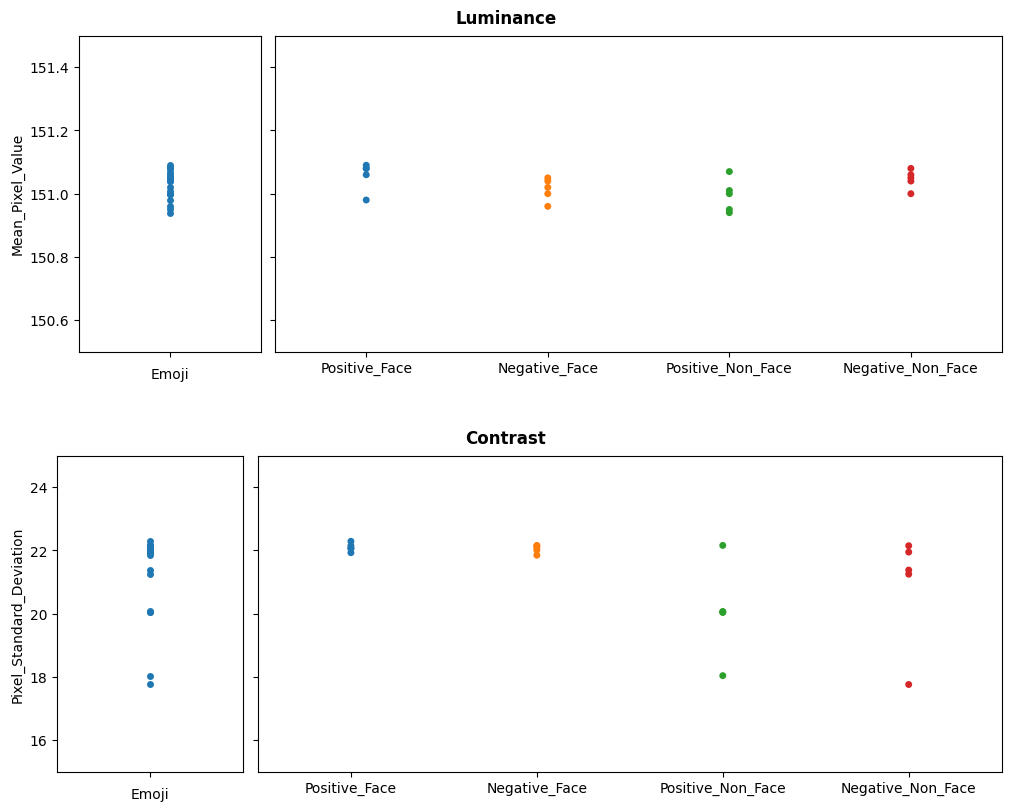

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"C:\Users\ali_a\Desktop\Single_Word_Processing_Stage\Single_Word_Processing\Localizer\Stimuli\Emojis\data\Emoji_Data.csv")

titles = ["Luminance", "Contrast"]
y_vals = ["Mean_Pixel_Value", "Pixel_Standard_Deviation"]
y_lims = [(150.50, 151.50), (15, 25)]

fig = plt.figure(figsize=(10, 8), constrained_layout=True)
subfigs = fig.subfigures(2, 1, hspace=0.1)  # Adjust hspace to reduce spacing
for row, subfig in enumerate(subfigs):
    subfig.suptitle(titles[row], fontweight='bold')
    axs = subfig.subplots(1, 2, sharey=True, gridspec_kw={"width_ratios": [1, len(df["Condition"].unique())]})
    sns.stripplot(data=df, y=y_vals[row], ax=axs[0], jitter=0)
    sns.stripplot(data=df, y=y_vals[row], x="Condition", hue="Condition", ax=axs[1], jitter=0)
    axs[0].set_xlabel('Emoji')
    axs[1].set_xlabel('')
    axs[0].set_ylim(*y_lims[row])
plt.show()


In [ ]:
# f, axs = plt.subplots(2, 2, figsize=(10, 8), sharey="row", gridspec_kw={"width_ratios": [1, len(df["Condition"].unique())]})
sns.stripplot(data=df, y='Mean_Pixel_Value', ax=axs[0, 0], jitter=0)
sns.stripplot(data=df, y='Pixel_Standard_Deviation', ax=axs[1, 0], jitter=0)
sns.stripplot(data=df, y='Mean_Pixel_Value', x="Condition", hue="Condition", ax=axs[0, 1], jitter=0)
sns.stripplot(data=df, y='Pixel_Standard_Deviation', x="Condition", hue="Condition", ax=axs[1, 1], jitter=0)

# Add titles
f.suptitle('Luminance', fontweight='bold')

# Set x-axis labels for the left-most graphs
axs[0, 0].set_xlabel('Emoji')
axs[1, 0].set_xlabel('Emoji')

# Remove x-axis labels for the right-most graphs
axs[0, 1].set_xlabel('')
axs[1, 1].set_xlabel('')

axs[0, 0].set_ylim(150, 152)
axs[1, 0].set_ylim(15, 25)

# Adjust space between the top and bottom graphs
plt.subplots_adjust(hspace=0.4)

plt.show()
